In [1]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(19)

In [2]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers


In [3]:
import numpy as np
#import pandas as pd

In [4]:
#movies_df = pd.read_csv("imdb_movies_global.csv")
movies_df = pd.read_csv("newDataWeighted.csv")

In [5]:
#movies_df =movies_df.fillna(0)
movies_df

,imdb_title_id,title,year_mv,duration,avg_vote_f,genre_Action,genre_Adult,genre_Adventure,genre_Animation,genre_Biography,...,lang_Visayan,lang_Washoe,lang_Wayuu,lang_Welsh,lang_Wolof,lang_Xhosa,lang_Yakut,lang_Yiddish,lang_Yoruba,lang_Zulu
0,tt0000574,The Story of the Kelly Gang,1906.0,70,6.1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,tt0001892,Den sorte drøm,1911.0,53,5.8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,tt0002101,Cleopatra,1912.0,100,5.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tt0002452,Independenta Romaniei,1912.0,120,6.7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,tt0002461,Richard III,1912.0,55,5.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86699,tt9905412,Ottam,2019.0,120,7.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86700,tt9905462,Pengalila,2019.0,111,8.8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86701,tt9906644,Manoharam,2019.0,122,6.8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86702,tt9908390,Le lion,2020.0,95,5.3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#movies_df = movies_df.replace("TV Movie 2019", "2019")
#movies_df = movies_df.astype({"year_mv": float})

In [7]:
#del movies_df["year_mv"]
#del movies_df["lang_5"]
del movies_df["imdb_title_id"]
del movies_df["title"]
movies_df

,year_mv,duration,avg_vote_f,genre_Action,genre_Adult,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,...,lang_Visayan,lang_Washoe,lang_Wayuu,lang_Welsh,lang_Wolof,lang_Xhosa,lang_Yakut,lang_Yiddish,lang_Yoruba,lang_Zulu
0,1906.0,70,6.1,0.0,0.0,0.0,0.0,1.0,0.0,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1911.0,53,5.8,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1912.0,100,5.2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1912.0,120,6.7,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1912.0,55,5.5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86699,2019.0,120,7.4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86700,2019.0,111,8.8,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86701,2019.0,122,6.8,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86702,2020.0,95,5.3,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#movies_df = movies_df[movies_df['country_USA'] == 1]
#movies_df.pop('country_USA')


In [9]:
train_dataset = movies_df.sample(frac=.95,random_state=1)
test_dataset = movies_df.drop(train_dataset.index)

In [10]:
train_stats = train_dataset.describe()
train_stats.pop("avg_vote_f")
train_stats = train_stats.transpose()
#train_stats.loc["lang_4_ Washoe",:]
train_stats

,count,mean,std,min,25%,50%,75%,max
year_mv,82369.0,1993.538734,24.194753,1894.0,1979.0,2003.0,2013.0,2020.0
duration,82369.0,100.469606,25.250188,40.0,88.0,96.0,108.0,3360.0
genre_Action,82369.0,0.147483,0.351797,0.0,0.0,0.0,0.0,1.0
genre_Adult,82369.0,0.000024,0.004928,0.0,0.0,0.0,0.0,1.0
genre_Adventure,82369.0,0.071613,0.236942,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
lang_Xhosa,82369.0,0.000219,0.012918,0.0,0.0,0.0,0.0,1.0
lang_Yakut,82369.0,0.000033,0.005578,0.0,0.0,0.0,0.0,1.0
lang_Yiddish,82369.0,0.000829,0.023666,0.0,0.0,0.0,0.0,1.0
lang_Yoruba,82369.0,0.000082,0.008031,0.0,0.0,0.0,0.0,1.0


In [11]:
train_labels = train_dataset.pop('avg_vote_f')
test_labels = test_dataset.pop('avg_vote_f')
train_dataset

,year_mv,duration,genre_Action,genre_Adult,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,...,lang_Visayan,lang_Washoe,lang_Wayuu,lang_Welsh,lang_Wolof,lang_Xhosa,lang_Yakut,lang_Yiddish,lang_Yoruba,lang_Zulu
38306,2016.0,99,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60114,1998.0,97,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51459,1973.0,92,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50669,1970.0,103,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69493,2007.0,91,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70766,2009.0,102,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72830,2009.0,87,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50420,1968.0,82,0.666667,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78975,2014.0,88,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#def norm(x):
#  return (x - train_stats['mean']) / train_stats['std']
#normed_train_data = norm(train_dataset).fillna(0)
#normed_test_data = norm(test_dataset).fillna(0)

In [13]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(train_dataset)
normed_train_data = X_scaler.transform(train_dataset)
normed_test_data = X_scaler.transform(test_dataset)

In [14]:
normed_train_data

array([[0.96825397, 0.01777108, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.82539683, 0.01716867, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.62698413, 0.01566265, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.58730159, 0.0126506 , 0.66666666, ..., 0.        , 0.        ,
        0.        ],
       [0.95238095, 0.01445783, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.50793651, 0.01686747, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [15]:
def build_model():
  model = keras.Sequential([
    layers.Dense(28, activation='relu', input_shape=[len(train_dataset.keys())]),
   # layers.Dense(28, activation='relu'),
    #layers.Dense(190, activation='relu'),
    layers.Dense(1)
  ])

#  optimizer = tf.keras.optimizers.RMSprop(0.001)
  optimizer = tf.keras.optimizers.RMSprop(0.0001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [16]:
model = build_model()

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 28)                13580     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 29        
Total params: 13,609
Trainable params: 13,609
Non-trainable params: 0
_________________________________________________________________


In [18]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


Epoch 1/1000
2446/2446 - 4s - loss: 13.5719 - mae: 3.0933 - mse: 13.5719 - val_loss: 1.8271 - val_mae: 1.0773 - val_mse: 1.8271
Epoch 2/1000
2446/2446 - 3s - loss: 1.6097 - mae: 1.0041 - mse: 1.6097 - val_loss: 1.4342 - val_mae: 0.9382 - val_mse: 1.4342
Epoch 3/1000
2446/2446 - 3s - loss: 1.4146 - mae: 0.9335 - mse: 1.4146 - val_loss: 1.3244 - val_mae: 0.8930 - val_mse: 1.3244
Epoch 4/1000
2446/2446 - 3s - loss: 1.3223 - mae: 0.8975 - mse: 1.3223 - val_loss: 1.2536 - val_mae: 0.8679 - val_mse: 1.2536
Epoch 5/1000
2446/2446 - 3s - loss: 1.2594 - mae: 0.8723 - mse: 1.2594 - val_loss: 1.2010 - val_mae: 0.8463 - val_mse: 1.2010
Epoch 6/1000
2446/2446 - 3s - loss: 1.2110 - mae: 0.8528 - mse: 1.2110 - val_loss: 1.1589 - val_mae: 0.8292 - val_mse: 1.1589
Epoch 7/1000
2446/2446 - 3s - loss: 1.1729 - mae: 0.8365 - mse: 1.1729 - val_loss: 1.1241 - val_mae: 0.8143 - val_mse: 1.1241
Epoch 8/1000
2446/2446 - 3s - loss: 1.1414 - mae: 0.8232 - mse: 1.1414 - val_loss: 1.0945 - val_mae: 0.8024 - val_ms

Epoch 66/1000
2446/2446 - 3s - loss: 0.9604 - mae: 0.7357 - mse: 0.9604 - val_loss: 0.9475 - val_mae: 0.7360 - val_mse: 0.9475
Epoch 67/1000
2446/2446 - 3s - loss: 0.9600 - mae: 0.7357 - mse: 0.9600 - val_loss: 0.9488 - val_mae: 0.7359 - val_mse: 0.9488
Epoch 68/1000
2446/2446 - 3s - loss: 0.9596 - mae: 0.7352 - mse: 0.9596 - val_loss: 0.9493 - val_mae: 0.7394 - val_mse: 0.9493
Epoch 69/1000
2446/2446 - 3s - loss: 0.9595 - mae: 0.7353 - mse: 0.9595 - val_loss: 0.9504 - val_mae: 0.7343 - val_mse: 0.9504
Epoch 70/1000
2446/2446 - 3s - loss: 0.9588 - mae: 0.7349 - mse: 0.9588 - val_loss: 0.9490 - val_mae: 0.7347 - val_mse: 0.9490
Epoch 71/1000
2446/2446 - 3s - loss: 0.9585 - mae: 0.7347 - mse: 0.9585 - val_loss: 0.9480 - val_mae: 0.7348 - val_mse: 0.9480
Epoch 72/1000
2446/2446 - 3s - loss: 0.9580 - mae: 0.7342 - mse: 0.9580 - val_loss: 0.9478 - val_mae: 0.7350 - val_mse: 0.9478
Epoch 73/1000
2446/2446 - 3s - loss: 0.9577 - mae: 0.7341 - mse: 0.9577 - val_loss: 0.9486 - val_mae: 0.7358 - 

Epoch 131/1000
2446/2446 - 3s - loss: 0.9435 - mae: 0.7260 - mse: 0.9435 - val_loss: 0.9420 - val_mae: 0.7330 - val_mse: 0.9420
Epoch 132/1000
2446/2446 - 3s - loss: 0.9436 - mae: 0.7259 - mse: 0.9436 - val_loss: 0.9419 - val_mae: 0.7323 - val_mse: 0.9419
Epoch 133/1000
2446/2446 - 3s - loss: 0.9435 - mae: 0.7258 - mse: 0.9435 - val_loss: 0.9415 - val_mae: 0.7332 - val_mse: 0.9415
Epoch 134/1000
2446/2446 - 3s - loss: 0.9435 - mae: 0.7258 - mse: 0.9435 - val_loss: 0.9425 - val_mae: 0.7348 - val_mse: 0.9425
Epoch 135/1000
2446/2446 - 3s - loss: 0.9430 - mae: 0.7257 - mse: 0.9430 - val_loss: 0.9410 - val_mae: 0.7323 - val_mse: 0.9410
Epoch 136/1000
2446/2446 - 3s - loss: 0.9428 - mae: 0.7255 - mse: 0.9428 - val_loss: 0.9416 - val_mae: 0.7327 - val_mse: 0.9416
Epoch 137/1000
2446/2446 - 3s - loss: 0.9427 - mae: 0.7255 - mse: 0.9427 - val_loss: 0.9429 - val_mae: 0.7346 - val_mse: 0.9429
Epoch 138/1000
2446/2446 - 3s - loss: 0.9427 - mae: 0.7254 - mse: 0.9427 - val_loss: 0.9417 - val_mae: 0

2446/2446 - 3s - loss: 0.9353 - mae: 0.7218 - mse: 0.9353 - val_loss: 0.9411 - val_mae: 0.7329 - val_mse: 0.9411
Epoch 196/1000
2446/2446 - 3s - loss: 0.9351 - mae: 0.7219 - mse: 0.9351 - val_loss: 0.9429 - val_mae: 0.7322 - val_mse: 0.9429
Epoch 197/1000
2446/2446 - 3s - loss: 0.9351 - mae: 0.7219 - mse: 0.9351 - val_loss: 0.9417 - val_mae: 0.7336 - val_mse: 0.9417
Epoch 198/1000
2446/2446 - 3s - loss: 0.9349 - mae: 0.7216 - mse: 0.9349 - val_loss: 0.9408 - val_mae: 0.7347 - val_mse: 0.9408
Epoch 199/1000
2446/2446 - 3s - loss: 0.9348 - mae: 0.7220 - mse: 0.9348 - val_loss: 0.9406 - val_mae: 0.7325 - val_mse: 0.9406
Epoch 200/1000
2446/2446 - 3s - loss: 0.9347 - mae: 0.7216 - mse: 0.9347 - val_loss: 0.9425 - val_mae: 0.7368 - val_mse: 0.9425
Epoch 201/1000
2446/2446 - 3s - loss: 0.9345 - mae: 0.7216 - mse: 0.9345 - val_loss: 0.9412 - val_mae: 0.7341 - val_mse: 0.9412
Epoch 202/1000
2446/2446 - 3s - loss: 0.9344 - mae: 0.7214 - mse: 0.9344 - val_loss: 0.9417 - val_mae: 0.7314 - val_mse

Epoch 260/1000
2446/2446 - 3s - loss: 0.9295 - mae: 0.7194 - mse: 0.9295 - val_loss: 0.9404 - val_mae: 0.7327 - val_mse: 0.9404
Epoch 261/1000
2446/2446 - 3s - loss: 0.9297 - mae: 0.7197 - mse: 0.9297 - val_loss: 0.9399 - val_mae: 0.7310 - val_mse: 0.9399
Epoch 262/1000
2446/2446 - 3s - loss: 0.9295 - mae: 0.7193 - mse: 0.9295 - val_loss: 0.9399 - val_mae: 0.7339 - val_mse: 0.9399
Epoch 263/1000
2446/2446 - 3s - loss: 0.9291 - mae: 0.7193 - mse: 0.9291 - val_loss: 0.9400 - val_mae: 0.7310 - val_mse: 0.9400
Epoch 264/1000
2446/2446 - 3s - loss: 0.9294 - mae: 0.7195 - mse: 0.9294 - val_loss: 0.9398 - val_mae: 0.7302 - val_mse: 0.9398
Epoch 265/1000
2446/2446 - 3s - loss: 0.9289 - mae: 0.7192 - mse: 0.9289 - val_loss: 0.9389 - val_mae: 0.7322 - val_mse: 0.9389
Epoch 266/1000
2446/2446 - 3s - loss: 0.9289 - mae: 0.7189 - mse: 0.9289 - val_loss: 0.9386 - val_mae: 0.7333 - val_mse: 0.9386
Epoch 267/1000
2446/2446 - 3s - loss: 0.9287 - mae: 0.7190 - mse: 0.9287 - val_loss: 0.9376 - val_mae: 0

2446/2446 - 3s - loss: 0.9221 - mae: 0.7169 - mse: 0.9221 - val_loss: 0.9326 - val_mae: 0.7280 - val_mse: 0.9326
Epoch 325/1000
2446/2446 - 3s - loss: 0.9219 - mae: 0.7167 - mse: 0.9219 - val_loss: 0.9306 - val_mae: 0.7299 - val_mse: 0.9306
Epoch 326/1000
2446/2446 - 3s - loss: 0.9219 - mae: 0.7167 - mse: 0.9219 - val_loss: 0.9299 - val_mae: 0.7297 - val_mse: 0.9299
Epoch 327/1000
2446/2446 - 3s - loss: 0.9217 - mae: 0.7166 - mse: 0.9217 - val_loss: 0.9312 - val_mae: 0.7278 - val_mse: 0.9312
Epoch 328/1000
2446/2446 - 3s - loss: 0.9216 - mae: 0.7166 - mse: 0.9216 - val_loss: 0.9307 - val_mae: 0.7320 - val_mse: 0.9307
Epoch 329/1000
2446/2446 - 3s - loss: 0.9216 - mae: 0.7165 - mse: 0.9216 - val_loss: 0.9297 - val_mae: 0.7300 - val_mse: 0.9297
Epoch 330/1000
2446/2446 - 3s - loss: 0.9216 - mae: 0.7165 - mse: 0.9216 - val_loss: 0.9290 - val_mae: 0.7300 - val_mse: 0.9290
Epoch 331/1000
2446/2446 - 3s - loss: 0.9213 - mae: 0.7165 - mse: 0.9213 - val_loss: 0.9298 - val_mae: 0.7306 - val_mse

Epoch 389/1000
2446/2446 - 4s - loss: 0.9171 - mae: 0.7149 - mse: 0.9171 - val_loss: 0.9327 - val_mae: 0.7309 - val_mse: 0.9327
Epoch 390/1000
2446/2446 - 4s - loss: 0.9174 - mae: 0.7152 - mse: 0.9174 - val_loss: 0.9319 - val_mae: 0.7300 - val_mse: 0.9319
Epoch 391/1000
2446/2446 - 4s - loss: 0.9175 - mae: 0.7153 - mse: 0.9175 - val_loss: 0.9321 - val_mae: 0.7308 - val_mse: 0.9321
Epoch 392/1000
2446/2446 - 4s - loss: 0.9175 - mae: 0.7152 - mse: 0.9175 - val_loss: 0.9317 - val_mae: 0.7327 - val_mse: 0.9317
Epoch 393/1000
2446/2446 - 4s - loss: 0.9171 - mae: 0.7152 - mse: 0.9171 - val_loss: 0.9317 - val_mae: 0.7298 - val_mse: 0.9317
Epoch 394/1000
2446/2446 - 4s - loss: 0.9169 - mae: 0.7149 - mse: 0.9169 - val_loss: 0.9314 - val_mae: 0.7297 - val_mse: 0.9314
Epoch 395/1000
2446/2446 - 3s - loss: 0.9170 - mae: 0.7149 - mse: 0.9170 - val_loss: 0.9312 - val_mae: 0.7323 - val_mse: 0.9312
Epoch 396/1000
2446/2446 - 4s - loss: 0.9170 - mae: 0.7151 - mse: 0.9170 - val_loss: 0.9321 - val_mae: 0

2446/2446 - 4s - loss: 0.9144 - mae: 0.7140 - mse: 0.9144 - val_loss: 0.9299 - val_mae: 0.7291 - val_mse: 0.9299
Epoch 454/1000
2446/2446 - 4s - loss: 0.9143 - mae: 0.7143 - mse: 0.9143 - val_loss: 0.9326 - val_mae: 0.7288 - val_mse: 0.9326
Epoch 455/1000
2446/2446 - 4s - loss: 0.9145 - mae: 0.7140 - mse: 0.9145 - val_loss: 0.9315 - val_mae: 0.7323 - val_mse: 0.9315
Epoch 456/1000
2446/2446 - 4s - loss: 0.9146 - mae: 0.7142 - mse: 0.9146 - val_loss: 0.9322 - val_mae: 0.7300 - val_mse: 0.9322
Epoch 457/1000
2446/2446 - 4s - loss: 0.9144 - mae: 0.7138 - mse: 0.9144 - val_loss: 0.9296 - val_mae: 0.7302 - val_mse: 0.9296
Epoch 458/1000
2446/2446 - 4s - loss: 0.9141 - mae: 0.7140 - mse: 0.9141 - val_loss: 0.9334 - val_mae: 0.7290 - val_mse: 0.9334
Epoch 459/1000
2446/2446 - 4s - loss: 0.9143 - mae: 0.7141 - mse: 0.9143 - val_loss: 0.9317 - val_mae: 0.7307 - val_mse: 0.9317
Epoch 460/1000
2446/2446 - 4s - loss: 0.9143 - mae: 0.7140 - mse: 0.9143 - val_loss: 0.9308 - val_mae: 0.7292 - val_mse

Epoch 518/1000
2446/2446 - 3s - loss: 0.9073 - mae: 0.7109 - mse: 0.9073 - val_loss: 0.9289 - val_mae: 0.7270 - val_mse: 0.9289
Epoch 519/1000
2446/2446 - 3s - loss: 0.9075 - mae: 0.7109 - mse: 0.9075 - val_loss: 0.9310 - val_mae: 0.7291 - val_mse: 0.9310
Epoch 520/1000
2446/2446 - 5s - loss: 0.9071 - mae: 0.7109 - mse: 0.9071 - val_loss: 0.9308 - val_mae: 0.7275 - val_mse: 0.9308
Epoch 521/1000
2446/2446 - 4s - loss: 0.9071 - mae: 0.7108 - mse: 0.9071 - val_loss: 0.9293 - val_mae: 0.7289 - val_mse: 0.9293
Epoch 522/1000
2446/2446 - 5s - loss: 0.9071 - mae: 0.7108 - mse: 0.9071 - val_loss: 0.9293 - val_mae: 0.7298 - val_mse: 0.9293
Epoch 523/1000
2446/2446 - 4s - loss: 0.9068 - mae: 0.7110 - mse: 0.9068 - val_loss: 0.9313 - val_mae: 0.7255 - val_mse: 0.9313
Epoch 524/1000
2446/2446 - 4s - loss: 0.9071 - mae: 0.7107 - mse: 0.9071 - val_loss: 0.9319 - val_mae: 0.7271 - val_mse: 0.9319
Epoch 525/1000
2446/2446 - 5s - loss: 0.9068 - mae: 0.7108 - mse: 0.9068 - val_loss: 0.9296 - val_mae: 0

2446/2446 - 4s - loss: 0.9023 - mae: 0.7090 - mse: 0.9023 - val_loss: 0.9292 - val_mae: 0.7276 - val_mse: 0.9292
Epoch 583/1000
2446/2446 - 3s - loss: 0.9024 - mae: 0.7088 - mse: 0.9024 - val_loss: 0.9296 - val_mae: 0.7262 - val_mse: 0.9296
Epoch 584/1000
2446/2446 - 3s - loss: 0.9021 - mae: 0.7090 - mse: 0.9021 - val_loss: 0.9309 - val_mae: 0.7256 - val_mse: 0.9309
Epoch 585/1000
2446/2446 - 4s - loss: 0.9025 - mae: 0.7093 - mse: 0.9025 - val_loss: 0.9300 - val_mae: 0.7279 - val_mse: 0.9300
Epoch 586/1000
2446/2446 - 3s - loss: 0.9019 - mae: 0.7089 - mse: 0.9019 - val_loss: 0.9310 - val_mae: 0.7282 - val_mse: 0.9310
Epoch 587/1000
2446/2446 - 4s - loss: 0.9021 - mae: 0.7088 - mse: 0.9021 - val_loss: 0.9337 - val_mae: 0.7264 - val_mse: 0.9337
Epoch 588/1000
2446/2446 - 4s - loss: 0.9017 - mae: 0.7089 - mse: 0.9017 - val_loss: 0.9298 - val_mae: 0.7262 - val_mse: 0.9298
Epoch 589/1000
2446/2446 - 4s - loss: 0.9017 - mae: 0.7089 - mse: 0.9017 - val_loss: 0.9292 - val_mae: 0.7265 - val_mse

Epoch 647/1000
2446/2446 - 4s - loss: 0.8997 - mae: 0.7079 - mse: 0.8997 - val_loss: 0.9302 - val_mae: 0.7269 - val_mse: 0.9302
Epoch 648/1000
2446/2446 - 4s - loss: 0.8992 - mae: 0.7076 - mse: 0.8992 - val_loss: 0.9323 - val_mae: 0.7282 - val_mse: 0.9323
Epoch 649/1000
2446/2446 - 4s - loss: 0.8997 - mae: 0.7079 - mse: 0.8997 - val_loss: 0.9290 - val_mae: 0.7257 - val_mse: 0.9290
Epoch 650/1000
2446/2446 - 3s - loss: 0.8993 - mae: 0.7078 - mse: 0.8993 - val_loss: 0.9320 - val_mae: 0.7247 - val_mse: 0.9320
Epoch 651/1000
2446/2446 - 3s - loss: 0.8993 - mae: 0.7075 - mse: 0.8993 - val_loss: 0.9275 - val_mae: 0.7260 - val_mse: 0.9275
Epoch 652/1000
2446/2446 - 3s - loss: 0.8991 - mae: 0.7075 - mse: 0.8991 - val_loss: 0.9291 - val_mae: 0.7263 - val_mse: 0.9291
Epoch 653/1000
2446/2446 - 4s - loss: 0.8992 - mae: 0.7076 - mse: 0.8992 - val_loss: 0.9299 - val_mae: 0.7253 - val_mse: 0.9299
Epoch 654/1000
2446/2446 - 4s - loss: 0.8990 - mae: 0.7074 - mse: 0.8990 - val_loss: 0.9320 - val_mae: 0

2446/2446 - 4s - loss: 0.8975 - mae: 0.7065 - mse: 0.8975 - val_loss: 0.9324 - val_mae: 0.7251 - val_mse: 0.9324
Epoch 712/1000
2446/2446 - 3s - loss: 0.8971 - mae: 0.7067 - mse: 0.8971 - val_loss: 0.9310 - val_mae: 0.7266 - val_mse: 0.9310
Epoch 713/1000
2446/2446 - 4s - loss: 0.8969 - mae: 0.7064 - mse: 0.8969 - val_loss: 0.9309 - val_mae: 0.7292 - val_mse: 0.9309
Epoch 714/1000
2446/2446 - 3s - loss: 0.8967 - mae: 0.7066 - mse: 0.8967 - val_loss: 0.9319 - val_mae: 0.7257 - val_mse: 0.9319
Epoch 715/1000
2446/2446 - 3s - loss: 0.8973 - mae: 0.7064 - mse: 0.8973 - val_loss: 0.9305 - val_mae: 0.7275 - val_mse: 0.9305
Epoch 716/1000
2446/2446 - 3s - loss: 0.8969 - mae: 0.7067 - mse: 0.8969 - val_loss: 0.9300 - val_mae: 0.7242 - val_mse: 0.9300
Epoch 717/1000
2446/2446 - 3s - loss: 0.8973 - mae: 0.7067 - mse: 0.8973 - val_loss: 0.9307 - val_mae: 0.7257 - val_mse: 0.9307
Epoch 718/1000
2446/2446 - 4s - loss: 0.8971 - mae: 0.7066 - mse: 0.8971 - val_loss: 0.9308 - val_mae: 0.7268 - val_mse

Epoch 776/1000
2446/2446 - 3s - loss: 0.8968 - mae: 0.7062 - mse: 0.8968 - val_loss: 0.9328 - val_mae: 0.7242 - val_mse: 0.9328
Epoch 777/1000
2446/2446 - 3s - loss: 0.8970 - mae: 0.7062 - mse: 0.8970 - val_loss: 0.9354 - val_mae: 0.7255 - val_mse: 0.9354
Epoch 778/1000
2446/2446 - 3s - loss: 0.8968 - mae: 0.7061 - mse: 0.8968 - val_loss: 0.9332 - val_mae: 0.7248 - val_mse: 0.9332
Epoch 779/1000
2446/2446 - 3s - loss: 0.8969 - mae: 0.7061 - mse: 0.8969 - val_loss: 0.9320 - val_mae: 0.7253 - val_mse: 0.9320
Epoch 780/1000
2446/2446 - 3s - loss: 0.8971 - mae: 0.7064 - mse: 0.8971 - val_loss: 0.9346 - val_mae: 0.7242 - val_mse: 0.9346
Epoch 781/1000
2446/2446 - 3s - loss: 0.8970 - mae: 0.7061 - mse: 0.8970 - val_loss: 0.9319 - val_mae: 0.7266 - val_mse: 0.9319
Epoch 782/1000
2446/2446 - 3s - loss: 0.8972 - mae: 0.7061 - mse: 0.8972 - val_loss: 0.9317 - val_mae: 0.7273 - val_mse: 0.9317
Epoch 783/1000
2446/2446 - 3s - loss: 0.8968 - mae: 0.7060 - mse: 0.8968 - val_loss: 0.9310 - val_mae: 0

2446/2446 - 3s - loss: 0.8972 - mae: 0.7059 - mse: 0.8972 - val_loss: 0.9327 - val_mae: 0.7299 - val_mse: 0.9327
Epoch 841/1000
2446/2446 - 3s - loss: 0.8976 - mae: 0.7061 - mse: 0.8976 - val_loss: 0.9302 - val_mae: 0.7235 - val_mse: 0.9302
Epoch 842/1000
2446/2446 - 4s - loss: 0.8975 - mae: 0.7060 - mse: 0.8975 - val_loss: 0.9317 - val_mae: 0.7265 - val_mse: 0.9317
Restoring model weights from the end of the best epoch.
Epoch 00842: early stopping


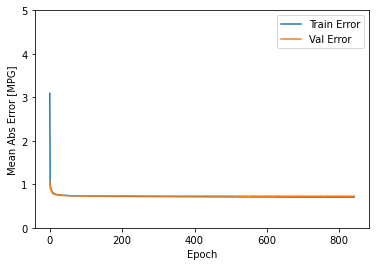

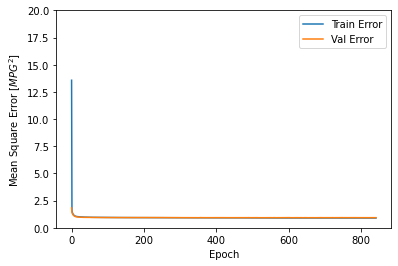

In [19]:
###### model = build_model()
EPOCHS = 1000
# The patience parameter is the amount of epochs to check for improvement
#val_loss
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=300,verbose=1,restore_best_weights=True)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = .05, verbose=2, callbacks=[early_stop])

plot_history(history)

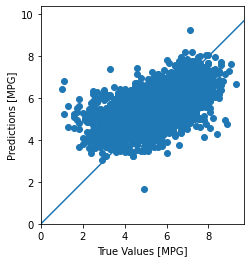

In [20]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [21]:
test_labels[0:25]

15     6.8
18     5.5
27     6.6
47     6.2
52     6.1
97     6.3
114    7.1
173    6.6
174    6.0
198    6.8
208    7.1
243    6.6
261    6.3
284    6.7
355    7.2
373    6.9
379    5.4
380    5.6
431    6.9
464    5.4
467    6.1
469    5.4
472    6.2
475    7.6
499    4.8
Name: avg_vote_f, dtype: float64

In [22]:
model.predict(normed_test_data[0:25])

array([[6.315468 ],
       [7.0612593],
       [6.207513 ],
       [6.341725 ],
       [6.0091677],
       [6.4662313],
       [6.6982107],
       [7.4391313],
       [5.8144536],
       [6.6976523],
       [6.458604 ],
       [6.5589733],
       [6.811069 ],
       [6.958359 ],
       [6.6581087],
       [6.508585 ],
       [6.643779 ],
       [6.501614 ],
       [6.629796 ],
       [6.1939864],
       [6.6325965],
       [6.846056 ],
       [6.445628 ],
       [6.8199034],
       [6.557098 ]], dtype=float32)

In [23]:
train_labels[0:25]

38306    4.2
60114    6.9
51459    4.8
50669    6.1
69493    4.9
31612    5.0
43034    7.5
81499    6.3
46635    7.7
44179    6.6
31950    6.8
57684    2.9
20141    3.8
9334     5.8
73888    7.8
29021    6.9
61399    6.0
69407    6.7
83555    4.6
665      6.1
40355    5.1
28360    3.8
5588     8.1
71390    6.6
86526    6.5
Name: avg_vote_f, dtype: float64

In [24]:
model.predict(normed_train_data[0:25])

array([[4.377314 ],
       [6.261859 ],
       [5.937336 ],
       [6.3041415],
       [5.3198166],
       [6.6736193],
       [6.8596883],
       [5.493448 ],
       [6.8992586],
       [5.9949465],
       [6.9448233],
       [5.589915 ],
       [5.3321185],
       [5.5655265],
       [6.3865757],
       [6.1182175],
       [5.203182 ],
       [5.979793 ],
       [4.7600927],
       [6.4534287],
       [5.6564016],
       [5.514216 ],
       [6.7120876],
       [6.494378 ],
       [6.1749325]], dtype=float32)

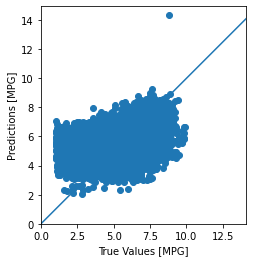

In [25]:
test_predictions = model.predict(normed_train_data).flatten()

plt.scatter(train_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [26]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

136/136 - 0s - loss: 0.9273 - mae: 0.7252 - mse: 0.9273
Testing set Mean Abs Error:  0.73 MPG


In [27]:
name = "modelWeighted_"+str(mse)+"-28-05-05-1-op0001.h5"
model.save(name)